Question1 Common Part

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Library to load Dataset
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading the Dataset1
data_1 = loadmat('/content/dataset_1.mat')
#Printing the values of dataset1 
print(data_1.keys())
print(data_1['samples'])
print(data_1['labels'])

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. .

In [ ]:
#Printing the shape and type of the samples and labels from Dataset1
x_1 = data_1['samples']
y_1 = data_1['labels']
print("Samples Data Type",x_1.dtype)
print("Label Data Type",y_1.dtype)
print("Shape of Samples", x_1.shape)
print("Shape of Label", y_1.shape)

Samples Data Type float32
Label Data Type int64
Shape of Samples (50000, 28, 28)
Shape of Label (1, 50000)


Answer of Q1_a:
10 samples from each Class


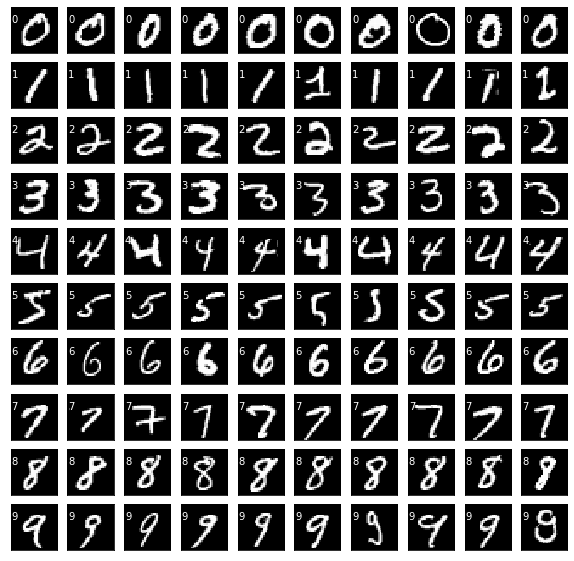

In [ ]:
def Q1_a():
  print("Answer of Q1_a:")
  #Creating the Figure
  fig = plt.figure(figsize=(10,10))
  #Adjusting the tune of the subplots layout
  #fig.subplots_adjust(left=0, right=1 , bottom=0, top=1, hspace=0.5, wspace=0.5)
  i=0
  #Printing the classes from 0-9 
  class_i=-1
  print("10 samples from each Class")
  #Printing the 100 images with 10 images of each class
  while (i<100):
    class_i=class_i + 1
    #Count variable to keep track of 10 images of each class
    count=0
    #Loop over total Dataset
    for j in range(0,50000):
      #Checking if the label is equal to the current class
      if class_i == data_1['labels'][0][j]:
        count=count+1
        #Printing 10 subplots in each line
        ax = fig.add_subplot(10, 10, i+1,xticks=[], yticks=[])
        #Printing the respective images in the subplots
        ax.imshow(data_1['samples'][j], cmap='gray', interpolation='nearest')
        #Increasing the images count
        i=i+1
        #Adding the text of the respective class in the image
        ax.text(0, 9, str(data_1['labels'][0][j]),color ='white')
        #If 10 images of a class are printed then break
        if count == 10 :
          break
Q1_a()

In [ ]:
#Loading the Dataset2
data_2 = loadmat('/content/dataset_2.mat')
#Printing the values of dataset2
print(data_2.keys())
print(data_2['samples'])
print(data_2['labels'])

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])
[[-3.74203958 -3.04465737]
 [ 4.60871196  7.01765941]
 [ 5.31135551  0.97011991]
 ...
 [ 5.17666258  5.10746383]
 [ 6.66563706  5.465137  ]
 [ 7.86690019  4.4964122 ]]
[[0 3 2 ... 3 3 3]]


In [ ]:
#Printing the shape and type of the samples and labels from Dataset2
x_2 = data_2['samples']
y_2 = data_2['labels']
print("Samples Data Type",x_2.dtype)
print("Label Data Type",y_2.dtype)
print("Shape of Samples", x_2.shape)
print("Shape of Label", y_2.shape)

Samples Data Type float64
Label Data Type int64
Shape of Samples (20000, 2)
Shape of Label (1, 20000)


Answer of Q1_b


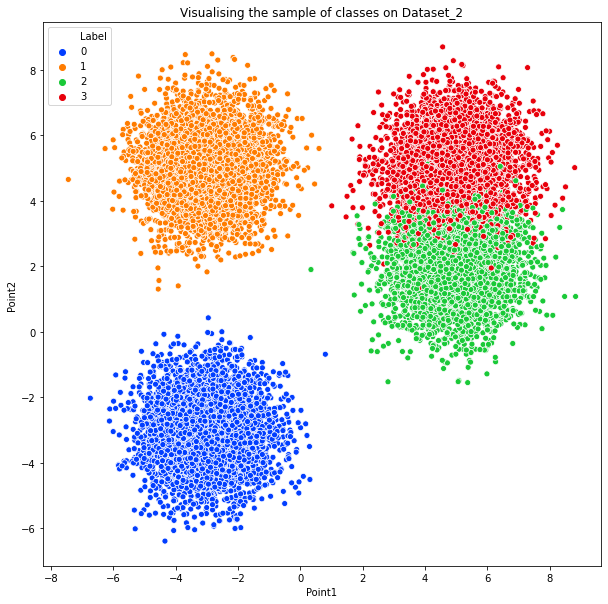

In [ ]:
def Q1_b():
  print("Answer of Q1_b")
  #Making a dataframe of the samples and labels
  Point1 = data_2['samples'][:,0]
  Point2 = data_2['samples'][:,1]
  Label = data_2['labels'][0]
  dataframe_2 = pd.DataFrame(list(zip(Point1,Point2,Label)), columns=["Point1","Point2","Label"])
  #print(dataframe_2)
  #Creating a figure of size 10*10
  plt.figure(figsize=(10,10))
  #Taking 4 colours for printing each class
  palette = sns.color_palette("bright", 4) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=dataframe_2, x="Point1",y="Point2",hue = "Label",legend='full',palette=palette)
  #Labelling the Plot
  plt.xlabel('Point1')
  plt.ylabel('Point2')
  plt.title("Visualising the sample of classes on Dataset_2")
  plt.show()
Q1_b()

The transform shape of the samples of Dataset1 (50000, 784)


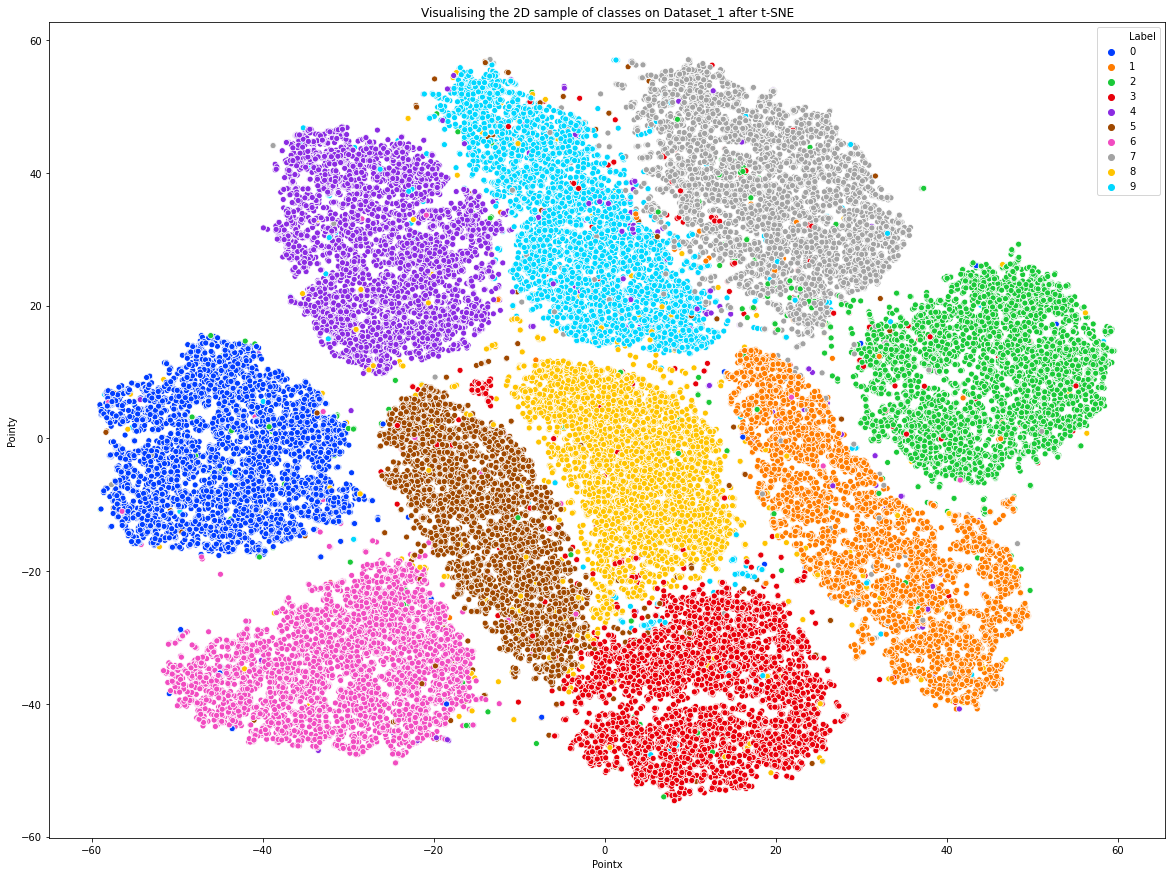

In [ ]:
def Q1_c():
  #Transforming the shape from 28,28 to 784
  transform_x = x_1.reshape(x_1.shape[0],x_1.shape[1]*x_1.shape[2])
  print("The transform shape of the samples of Dataset1", transform_x.shape)
  #Using t-SNE to reduce to 2 dimensions
  #tsne_2d = TSNE(n_components = 2,random_state=0)
  #X_2d = tsne_2d.fit_transform(transform_x)
  f = open("/content/TSNE2.txt")
  X_2d = np.loadtxt(f, delimiter=",")
  #Keeping the 2 points as there are 2 dimensions 
  pointx = X_2d[:,0]
  pointy = X_2d[:,1]
  #Storing the Label data
  label = data_1['labels'][0]
  #Making a dataframe of the 2 points and labels
  dataframe_1c = pd.DataFrame(list(zip(pointx,pointy,label)), columns=["Pointx","Pointy","Label"])
  #Creating a figure of size 15*15
  plt.figure(figsize=(20,15))
  #Taking 10 colours for printing each class
  palette = sns.color_palette("bright", 10) 
  #Plotting the scatterplot for 2 Points using seaborn
  sns.scatterplot(data=dataframe_1c, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Labelling the Plot
  plt.xlabel('Pointx')
  plt.ylabel('Pointy')
  plt.title("Visualising the 2D sample of classes on Dataset_1 after t-SNE")
  plt.show()
Q1_c()

The transform shape of the samples of Dataset1 (50000, 784)


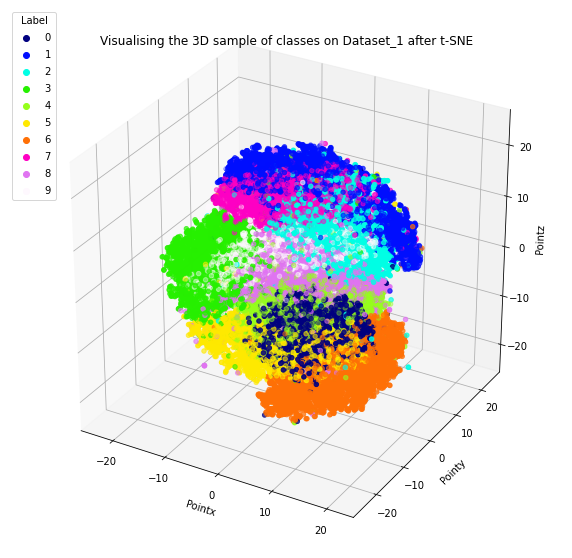

In [ ]:
def Q1_d():
  #Transforming the shape from 28,28 to 784
  transform_x = x_1.reshape(x_1.shape[0],x_1.shape[1]*x_1.shape[2])
  print("The transform shape of the samples of Dataset1", transform_x.shape)
  #Using t-SNE to reduce to 3 dimensions
  #tsne_3d = TSNE(n_components = 3,random_state=0)
  #X_3d = tsne_3d.fit_transform(transform_x)
  f = open("/content/TSNE3.txt")
  X_3d = np.loadtxt(f, delimiter=",")
  #Keeping the 3 points as there are 3 dimensions 
  pointx = X_3d[:,0]
  pointy = X_3d[:,1]
  pointz = X_3d[:,2]
  #Storing the Label data
  label = data_1['labels'][0]
  
  #Creating a figure of size 10*10
  plt.figure(figsize=(10,10))
  #Plot the projection 3D
  ax = plt.axes(projection='3d')
  #Plotting the scatter 3D plot
  plotted_fig = ax.scatter3D(pointx,pointy,pointz, c=data_1['labels'][0], cmap="gist_ncar")
  #Labelling the Plot
  ax.set_xlabel('Pointx')
  ax.set_ylabel('Pointy')
  ax.set_zlabel('Pointz')
  #Adding the Legend
  ax.legend(loc="upper left",*plotted_fig.legend_elements(num=10),title="Label")
  plt.title("Visualising the 3D sample of classes on Dataset_1 after t-SNE")
  plt.show()
Q1_d()